<a href="https://colab.research.google.com/github/ClauRozasG/TextMining-Encuestas/blob/main/An%C3%A1lisis_de_respuesta_de_encuestas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
!pip install unidecode

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import unicodedata
from unidecode import unidecode

# **Leer datas**

In [45]:
df_enps_202310= pd.read_csv("Enps_Pacifico_202310.csv")
df_enps_202310.head()

,EMPRESA,PERIODO,CODIGO_COLABORADOR,NOTA_AGRUPADA,COD_PREGUNTA,DESC_PREGUNTA,NOTA_ABIERTA,UO1,UO2,UO3,...,CLASIFICACION_DE_UNIDADES,TIPO_ROL_HOM,Total Vida (grupos),CATEGORIA_LABORAL,SEXO,GRUPO,POSICION,Switch Edad,Rango_Tiempo_EMPRESA,Rango_Tiempo_función
0,Pacifico Seguros,202310,300008,NaN,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,Actualmente el trabajo hibrido,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE TI,CHAPTER AREA TI,...,NO FFVV,Soporte estratégico,NaN,Colaboradores no gerenciales,Masculino,ESPECIALISTA,ESPECIALISTA DE SISTEMAS DE INFORMACION,ENTRE 50 - 65Y,4.[>10],1.[0-1]
1,Pacifico Seguros,202310,300008,NaN,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,Buscar una mejor forma de que haya estacionami...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE TI,CHAPTER AREA TI,...,NO FFVV,Soporte estratégico,NaN,Colaboradores no gerenciales,Masculino,ESPECIALISTA,ESPECIALISTA DE SISTEMAS DE INFORMACION,ENTRE 50 - 65Y,4.[>10],1.[0-1]
2,Pacifico Seguros,202310,300008,NaN,EX-JEX-0083-PACS,"De acuerdo a tu percepción, ¿qué factores cree...",La forma de trabajo (hibrido),DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE TI,CHAPTER AREA TI,...,NO FFVV,Soporte estratégico,NaN,Colaboradores no gerenciales,Masculino,ESPECIALISTA,ESPECIALISTA DE SISTEMAS DE INFORMACION,ENTRE 50 - 65Y,4.[>10],1.[0-1]
3,Pacifico Seguros,202310,300012,NaN,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,NaN,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA DE SUSCRIPCION PATRIMONIAL,AREA DE SUSCRIPCION PATRIMONIAL,...,NO FFVV,Especializado,NaN,Colaboradores no gerenciales,Femenino,SUSCRIPTOR,SUSCRIPTOR DE ENDOSOS,ENTRE 40-50Y,4.[>10],3.[3-10]
4,Pacifico Seguros,202310,300012,NaN,EX-JEX-0083-PACS,"De acuerdo a tu percepción, ¿qué factores cree...",NaN,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA DE SUSCRIPCION PATRIMONIAL,AREA DE SUSCRIPCION PATRIMONIAL,...,NO FFVV,Especializado,NaN,Colaboradores no gerenciales,Femenino,SUSCRIPTOR,SUSCRIPTOR DE ENDOSOS,ENTRE 40-50Y,4.[>10],3.[3-10]


In [46]:
df_enps_202310.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8570 entries, 0 to 8569
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   EMPRESA                    8570 non-null   object
 1   PERIODO                    8570 non-null   int64 
 2   CODIGO_COLABORADOR         8570 non-null   int64 
 3   NOTA_AGRUPADA              3428 non-null   object
 4   COD_PREGUNTA               8570 non-null   object
 5   DESC_PREGUNTA              8570 non-null   object
 6   NOTA_ABIERTA               4954 non-null   object
 7   UO1                        8570 non-null   object
 8   UO2                        8570 non-null   object
 9   UO3                        8570 non-null   object
 10  UO4                        8570 non-null   object
 11  UO5                        8570 non-null   object
 12  CLASIFICACION_DE_UNIDADES  8570 non-null   object
 13  TIPO_ROL_HOM               4950 non-null   object
 14  Total Vi

In [47]:
df_enps_202304= pd.read_csv("Enps_Pacifico_202304 (2).csv")
df_enps_202304.head()

,EMPRESA,PERIODO,CODIGO_COLABORADOR,NOTA_AGRUPADA,COD_PREGUNTA,DESC_PREGUNTA,NOTA_ABIERTA,UO1,UO2,UO3,...,CLASIFICACION_DE_UNIDADES,TIPO_ROL_HOM,Total Vida (grupos),CATEGORIA_LABORAL,SEXO,GRUPO,POSICION,Switch Edad,Rango_Tiempo_EMPRESA,Rango_Tiempo_función
0,Pacifico Seguros,202304,300008,NaN,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,Bien por mi jefa que nos pone retos y eso me h...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE DATA & ANALYTICS,GOBIERNO Y GESTION DE DATOS,...,NO FFVV,Soporte estratégico,NaN,Colaboradores no gerenciales,Masculino,JEFE,JEFE DE GESTION DE INFORMACION,ENTRE 50 - 65Y,4.[>10],3.[3-10]
1,Pacifico Seguros,202304,300008,NaN,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,Es una empresa que cuida mucho a sus colaborad...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE DATA & ANALYTICS,GOBIERNO Y GESTION DE DATOS,...,NO FFVV,Soporte estratégico,NaN,Colaboradores no gerenciales,Masculino,JEFE,JEFE DE GESTION DE INFORMACION,ENTRE 50 - 65Y,4.[>10],3.[3-10]
2,Pacifico Seguros,202304,300012,NaN,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,NaN,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA DE SUSCRIPCION PATRIMONIAL,AREA DE SUSCRIPCION PATRIMONIAL,...,NO FFVV,Especializado,NaN,Colaboradores no gerenciales,Femenino,SUSCRIPTOR,SUSCRIPTOR DE ENDOSOS,ENTRE 40-50Y,4.[>10],3.[3-10]
3,Pacifico Seguros,202304,300012,NaN,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,NaN,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA DE SUSCRIPCION PATRIMONIAL,AREA DE SUSCRIPCION PATRIMONIAL,...,NO FFVV,Especializado,NaN,Colaboradores no gerenciales,Femenino,SUSCRIPTOR,SUSCRIPTOR DE ENDOSOS,ENTRE 40-50Y,4.[>10],3.[3-10]
4,Pacifico Seguros,202304,300023,NaN,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,'- Generar canales de comunicación - Mejorar...,DIVISION DE NEGOC PERSO CLIENTES E INNOV,TRIBU VEHICULARES,GESTION DE PRODUCTOS EMPRESARIALES,...,NO FFVV,Especializado,NaN,Midle manager,Femenino,GERENTE,GERENTE DE SUSCRIPCION,ENTRE 50 - 65Y,4.[>10],3.[3-10]


In [48]:
df_enps_202304.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7092 entries, 0 to 7091
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   EMPRESA                    7092 non-null   object
 1   PERIODO                    7092 non-null   int64 
 2   CODIGO_COLABORADOR         7092 non-null   int64 
 3   NOTA_AGRUPADA              3546 non-null   object
 4   COD_PREGUNTA               7092 non-null   object
 5   DESC_PREGUNTA              7092 non-null   object
 6   NOTA_ABIERTA               3207 non-null   object
 7   UO1                        7092 non-null   object
 8   UO2                        7092 non-null   object
 9   UO3                        7092 non-null   object
 10  UO4                        7092 non-null   object
 11  UO5                        7092 non-null   object
 12  CLASIFICACION_DE_UNIDADES  7092 non-null   object
 13  TIPO_ROL_HOM               3784 non-null   object
 14  Total Vi

In [49]:
df_movers= pd.read_csv("movers.csv")
df_movers.head()

,EMPRESA,CODIGO_COLABORADOR,Q22023,Q42023,Diferencia
0,Pacifico Seguros,300012.0,Promotores,Promotores,Se Mantiene
1,Pacifico Seguros,300045.0,Promotores,Promotores,Se Mantiene
2,Pacifico Seguros,300060.0,Promotores,Promotores,Se Mantiene
3,Pacifico Seguros,300094.0,Promotores,Promotores,Se Mantiene
4,Pacifico Seguros,300100.0,Promotores,Promotores,Se Mantiene


In [50]:
print(df_enps_202304.columns)

Index(['EMPRESA', 'PERIODO', 'CODIGO_COLABORADOR', 'NOTA_AGRUPADA',
       'COD_PREGUNTA', 'DESC_PREGUNTA', 'NOTA_ABIERTA', 'UO1', 'UO2', 'UO3',
       'UO4', 'UO5', 'CLASIFICACION_DE_UNIDADES', 'TIPO_ROL_HOM',
       'Total Vida (grupos)', 'CATEGORIA_LABORAL', 'SEXO', 'GRUPO', 'POSICION',
       'Switch Edad', 'Rango_Tiempo_EMPRESA', 'Rango_Tiempo_función'],
      dtype='object')


In [51]:
df_nuevo=pd.concat([df_enps_202304,df_enps_202310],axis=0, ignore_index=True)
df_nuevo

,EMPRESA,PERIODO,CODIGO_COLABORADOR,NOTA_AGRUPADA,COD_PREGUNTA,DESC_PREGUNTA,NOTA_ABIERTA,UO1,UO2,UO3,...,CLASIFICACION_DE_UNIDADES,TIPO_ROL_HOM,Total Vida (grupos),CATEGORIA_LABORAL,SEXO,GRUPO,POSICION,Switch Edad,Rango_Tiempo_EMPRESA,Rango_Tiempo_función
0,Pacifico Seguros,202304,300008,NaN,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,Bien por mi jefa que nos pone retos y eso me h...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE DATA & ANALYTICS,GOBIERNO Y GESTION DE DATOS,...,NO FFVV,Soporte estratégico,NaN,Colaboradores no gerenciales,Masculino,JEFE,JEFE DE GESTION DE INFORMACION,ENTRE 50 - 65Y,4.[>10],3.[3-10]
1,Pacifico Seguros,202304,300008,NaN,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,Es una empresa que cuida mucho a sus colaborad...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE DATA & ANALYTICS,GOBIERNO Y GESTION DE DATOS,...,NO FFVV,Soporte estratégico,NaN,Colaboradores no gerenciales,Masculino,JEFE,JEFE DE GESTION DE INFORMACION,ENTRE 50 - 65Y,4.[>10],3.[3-10]
2,Pacifico Seguros,202304,300012,NaN,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,NaN,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA DE SUSCRIPCION PATRIMONIAL,AREA DE SUSCRIPCION PATRIMONIAL,...,NO FFVV,Especializado,NaN,Colaboradores no gerenciales,Femenino,SUSCRIPTOR,SUSCRIPTOR DE ENDOSOS,ENTRE 40-50Y,4.[>10],3.[3-10]
3,Pacifico Seguros,202304,300012,NaN,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,NaN,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA DE SUSCRIPCION PATRIMONIAL,AREA DE SUSCRIPCION PATRIMONIAL,...,NO FFVV,Especializado,NaN,Colaboradores no gerenciales,Femenino,SUSCRIPTOR,SUSCRIPTOR DE ENDOSOS,ENTRE 40-50Y,4.[>10],3.[3-10]
4,Pacifico Seguros,202304,300023,NaN,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,'- Generar canales de comunicación - Mejorar...,DIVISION DE NEGOC PERSO CLIENTES E INNOV,TRIBU VEHICULARES,GESTION DE PRODUCTOS EMPRESARIALES,...,NO FFVV,Especializado,NaN,Midle manager,Femenino,GERENTE,GERENTE DE SUSCRIPCION,ENTRE 50 - 65Y,4.[>10],3.[3-10]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15657,Pacifico Seguros,202310,635504,T2B,EX-JEX-0001-PACS,En forma global y pensando en todos los aspect...,NaN,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE TI,CHAPTER AREA TI,...,NO FFVV,Perfil digital,NaN,Colaboradores no gerenciales,Masculino,CHAPTER LEAD,CHAPTER LEAD PERIFERICOS GENERALES,ENTRE 30-40Y,1.[0-1],1.[0-1]
15658,Pacifico Seguros,202310,635507,T2B,EX-JEX-0001-PACS,En forma global y pensando en todos los aspect...,NaN,DIVISION DE NEGOC PERSO CLIENTES E INNOV,TRIBU DE VENTA DIGITAL,REVENUE CENTER,...,FFVV,NaN,NaN,Colaboradores no gerenciales,Masculino,ASESOR,ASESOR DE TELEVENTAS,ENTRE 30-40Y,1.[0-1],1.[0-1]
15659,Pacifico Seguros,202310,635508,T2B,EX-JEX-0001-PACS,En forma global y pensando en todos los aspect...,NaN,DIVISION DE NEGOC PERSO CLIENTES E INNOV,TRIBU DE CANALES DE ATENCION,GESTION DE PROVEEDORES Y CONTROL,...,NO FFVV,Soporte estratégico,NaN,Colaboradores no gerenciales,Femenino,AUDITOR,AUDITOR DE CALIDAD,ENTRE 40-50Y,1.[0-1],1.[0-1]
15660,Pacifico Seguros,202310,635509,T2B,EX-JEX-0001-PACS,En forma global y pensando en todos los aspect...,NaN,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,ESTRATEGIA Y GESTION ALIANZAS,ESTRATEGIA Y GESTION ALIANZAS,...,FFVV,Soporte estratégico,NaN,Colaboradores no gerenciales,Masculino,EJECUTIVO,EJECUTIVO DE VENTAS MODULOS CORPORATIVOS,ENTRE 30-40Y,1.[0-1],1.[0-1]


In [52]:
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15662 entries, 0 to 15661
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   EMPRESA                    15662 non-null  object
 1   PERIODO                    15662 non-null  int64 
 2   CODIGO_COLABORADOR         15662 non-null  int64 
 3   NOTA_AGRUPADA              6974 non-null   object
 4   COD_PREGUNTA               15662 non-null  object
 5   DESC_PREGUNTA              15662 non-null  object
 6   NOTA_ABIERTA               8161 non-null   object
 7   UO1                        15662 non-null  object
 8   UO2                        15662 non-null  object
 9   UO3                        15662 non-null  object
 10  UO4                        15662 non-null  object
 11  UO5                        15662 non-null  object
 12  CLASIFICACION_DE_UNIDADES  15662 non-null  object
 13  TIPO_ROL_HOM               8734 non-null   object
 14  Total 

In [53]:
df_nuevo=df_nuevo.fillna(' ')
df_nuevo

,EMPRESA,PERIODO,CODIGO_COLABORADOR,NOTA_AGRUPADA,COD_PREGUNTA,DESC_PREGUNTA,NOTA_ABIERTA,UO1,UO2,UO3,...,CLASIFICACION_DE_UNIDADES,TIPO_ROL_HOM,Total Vida (grupos),CATEGORIA_LABORAL,SEXO,GRUPO,POSICION,Switch Edad,Rango_Tiempo_EMPRESA,Rango_Tiempo_función
0,Pacifico Seguros,202304,300008,,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,Bien por mi jefa que nos pone retos y eso me h...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE DATA & ANALYTICS,GOBIERNO Y GESTION DE DATOS,...,NO FFVV,Soporte estratégico,,Colaboradores no gerenciales,Masculino,JEFE,JEFE DE GESTION DE INFORMACION,ENTRE 50 - 65Y,4.[>10],3.[3-10]
1,Pacifico Seguros,202304,300008,,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,Es una empresa que cuida mucho a sus colaborad...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE DATA & ANALYTICS,GOBIERNO Y GESTION DE DATOS,...,NO FFVV,Soporte estratégico,,Colaboradores no gerenciales,Masculino,JEFE,JEFE DE GESTION DE INFORMACION,ENTRE 50 - 65Y,4.[>10],3.[3-10]
2,Pacifico Seguros,202304,300012,,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA DE SUSCRIPCION PATRIMONIAL,AREA DE SUSCRIPCION PATRIMONIAL,...,NO FFVV,Especializado,,Colaboradores no gerenciales,Femenino,SUSCRIPTOR,SUSCRIPTOR DE ENDOSOS,ENTRE 40-50Y,4.[>10],3.[3-10]
3,Pacifico Seguros,202304,300012,,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,AREA DE SUSCRIPCION PATRIMONIAL,AREA DE SUSCRIPCION PATRIMONIAL,...,NO FFVV,Especializado,,Colaboradores no gerenciales,Femenino,SUSCRIPTOR,SUSCRIPTOR DE ENDOSOS,ENTRE 40-50Y,4.[>10],3.[3-10]
4,Pacifico Seguros,202304,300023,,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,'- Generar canales de comunicación - Mejorar...,DIVISION DE NEGOC PERSO CLIENTES E INNOV,TRIBU VEHICULARES,GESTION DE PRODUCTOS EMPRESARIALES,...,NO FFVV,Especializado,,Midle manager,Femenino,GERENTE,GERENTE DE SUSCRIPCION,ENTRE 50 - 65Y,4.[>10],3.[3-10]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15657,Pacifico Seguros,202310,635504,T2B,EX-JEX-0001-PACS,En forma global y pensando en todos los aspect...,,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE TI,CHAPTER AREA TI,...,NO FFVV,Perfil digital,,Colaboradores no gerenciales,Masculino,CHAPTER LEAD,CHAPTER LEAD PERIFERICOS GENERALES,ENTRE 30-40Y,1.[0-1],1.[0-1]
15658,Pacifico Seguros,202310,635507,T2B,EX-JEX-0001-PACS,En forma global y pensando en todos los aspect...,,DIVISION DE NEGOC PERSO CLIENTES E INNOV,TRIBU DE VENTA DIGITAL,REVENUE CENTER,...,FFVV,,,Colaboradores no gerenciales,Masculino,ASESOR,ASESOR DE TELEVENTAS,ENTRE 30-40Y,1.[0-1],1.[0-1]
15659,Pacifico Seguros,202310,635508,T2B,EX-JEX-0001-PACS,En forma global y pensando en todos los aspect...,,DIVISION DE NEGOC PERSO CLIENTES E INNOV,TRIBU DE CANALES DE ATENCION,GESTION DE PROVEEDORES Y CONTROL,...,NO FFVV,Soporte estratégico,,Colaboradores no gerenciales,Femenino,AUDITOR,AUDITOR DE CALIDAD,ENTRE 40-50Y,1.[0-1],1.[0-1]
15660,Pacifico Seguros,202310,635509,T2B,EX-JEX-0001-PACS,En forma global y pensando en todos los aspect...,,DIVISION NEGOC EMPRE CORRED Y ALIANZAS,ESTRATEGIA Y GESTION ALIANZAS,ESTRATEGIA Y GESTION ALIANZAS,...,FFVV,Soporte estratégico,,Colaboradores no gerenciales,Masculino,EJECUTIVO,EJECUTIVO DE VENTAS MODULOS CORPORATIVOS,ENTRE 30-40Y,1.[0-1],1.[0-1]


In [54]:
df_nuevo['NOTA_ABIERTA'] = df_nuevo['NOTA_ABIERTA'].apply(lambda x: unidecode(str(x)))

# **Nubes de palabras**

In [55]:
total_palabras = ' '
stopwords = STOPWORDS.update(['que', 'qué', 'con', 'de', 'te', 'en', 'la', 'lo', 'le', 'el', 'las', 'los', 'les', 'por', 'es',
                              'son', 'se', 'para', 'un', 'una', 'chicos', 'su', 'si', 'chic','nos', 'ya', 'hay', 'esta',
                              'pero', 'del', 'mas', 'más', 'eso', 'este', 'como', 'así', 'todo', 'https','Media','omitted',
                              'y', 'mi', 'o', 'q', 'yo', 'al', 'xd', 'sin', 'tu', 'algún', 'donde', 'quien', 'xq', 'hasta', 'v', ' '])

for mensaje in df_nuevo['NOTA_ABIERTA'].values:
    palabras = str(mensaje).lower().split() # Obtener las palabras de cada línea del txt
    for palabra in palabras:
        total_palabras = total_palabras + palabra + ' ' # Acumular todas las palabras


#wordcloud = WordCloud(width = 1000, height = 700,
#                background_color ='white',
#                stopwords = stopwords,
#                min_font_size = 10).generate(total_palabras)

#wordcloud.to_image()

# **Separación de palabras**

In [56]:
palabras_list = total_palabras.split()
df_palabras = pd.DataFrame({'Palabra': palabras_list})
df_palabras.to_csv('palabras.csv', index=False, encoding='utf-8')

In [57]:
import re
df_palabras=pd.read_csv("palabras.csv")
df_palabras.head()

,Palabra
0,bien
1,por
2,mi
3,jefa
4,que


In [58]:
clean_txt = []
for palabra in df_palabras['Palabra']:
   desc = str(palabra).lower()

   desc = re.sub(r"&lt;/?.*?&gt;", " &lt;&gt ", desc)

   desc = re.sub(r"[^a-zA-Z\s]", "", desc)
   clean_txt.append(desc)
df_palabras["clean"] = clean_txt
df_palabras.to_csv('palabras_mejoradas.csv', index=False, encoding='utf-8')

In [59]:
df_palabras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89932 entries, 0 to 89931
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Palabra  89932 non-null  object
 1   clean    89932 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


# **Nube de palabras general**

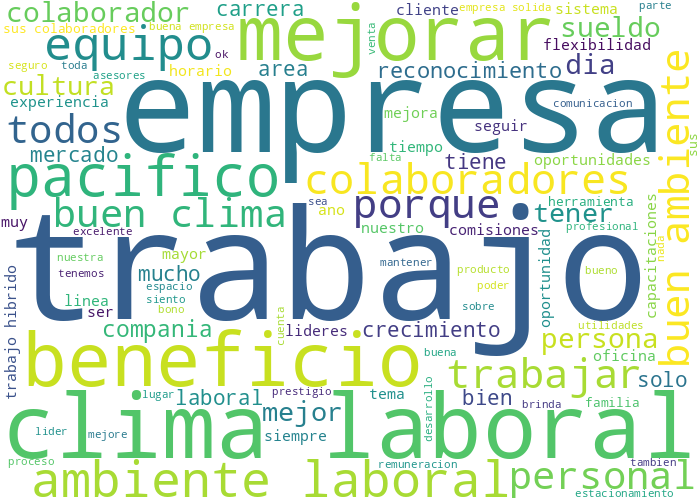

In [60]:
total_palabras = ' '
stopwords = STOPWORDS.update(['que', 'qué', 'con', 'de', 'te', 'en', 'la', 'lo', 'le', 'el', 'las', 'los', 'les', 'por', 'es',
                              'son', 'se', 'para', 'un', 'una', 'chicos', 'su', 'si', 'chic','nos', 'ya', 'hay', 'esta',
                              'pero', 'del', 'mas', 'más', 'eso', 'este', 'como', 'así', 'todo', 'https','Media','omitted',
                              'y', 'mi', 'o', 'q', 'yo', 'al', 'xd', 'sin', 'tu', 'algún', 'donde', 'quien', 'xq', 'hasta', 'v', ' '])

for mensaje in df_palabras['clean'].values:
    palabras = str(mensaje).lower().split()
    for palabra in palabras:
        total_palabras = total_palabras + palabra + ' '


wordcloud = WordCloud(width = 700, height = 500,
               background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(total_palabras)

wordcloud.to_image()

In [92]:
df_movers_nuevo=pd.merge(df_nuevo, df_movers, on ='CODIGO_COLABORADOR')
df_movers_nuevo

,EMPRESA_x,PERIODO,CODIGO_COLABORADOR,NOTA_AGRUPADA,COD_PREGUNTA,DESC_PREGUNTA,NOTA_ABIERTA,UO1,UO2,UO3,...,SEXO,GRUPO,POSICION,Switch Edad,Rango_Tiempo_EMPRESA,Rango_Tiempo_función,EMPRESA_y,Q22023,Q42023,Diferencia
0,Pacifico Seguros,202304,300008,,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,Bien por mi jefa que nos pone retos y eso me h...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE DATA & ANALYTICS,GOBIERNO Y GESTION DE DATOS,...,Masculino,JEFE,JEFE DE GESTION DE INFORMACION,ENTRE 50 - 65Y,4.[>10],3.[3-10],Pacifico Seguros,Pasivos,Promotores,Paso De Pasivo A Promotor
1,Pacifico Seguros,202304,300008,,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,Es una empresa que cuida mucho a sus colaborad...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE DATA & ANALYTICS,GOBIERNO Y GESTION DE DATOS,...,Masculino,JEFE,JEFE DE GESTION DE INFORMACION,ENTRE 50 - 65Y,4.[>10],3.[3-10],Pacifico Seguros,Pasivos,Promotores,Paso De Pasivo A Promotor
2,Pacifico Seguros,202304,300008,Pasivos,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE DATA & ANALYTICS,GOBIERNO Y GESTION DE DATOS,...,Masculino,JEFE,JEFE DE GESTION DE INFORMACION,ENTRE 50 - 65Y,4.[>10],3.[3-10],Pacifico Seguros,Pasivos,Promotores,Paso De Pasivo A Promotor
3,Pacifico Seguros,202304,300008,T2B,EX-JEX-0001-PACS,En forma global y pensando en todos los aspect...,,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE DATA & ANALYTICS,GOBIERNO Y GESTION DE DATOS,...,Masculino,JEFE,JEFE DE GESTION DE INFORMACION,ENTRE 50 - 65Y,4.[>10],3.[3-10],Pacifico Seguros,Pasivos,Promotores,Paso De Pasivo A Promotor
4,Pacifico Seguros,202310,300008,,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,Actualmente el trabajo hibrido,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE TI,CHAPTER AREA TI,...,Masculino,ESPECIALISTA,ESPECIALISTA DE SISTEMAS DE INFORMACION,ENTRE 50 - 65Y,4.[>10],1.[0-1],Pacifico Seguros,Pasivos,Promotores,Paso De Pasivo A Promotor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15657,Pacifico Seguros,202310,638869,,EX-JEX-0072-PACS,Coméntanos la principal razón de tu puntuación...,El ambiente laboral es bueno y fomentan la ins...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE TI,GERENCIA DE INFRA Y OPERACIONES DE TI,...,Femenino,ESPECIALISTA,ESPECIALISTA DE PROYECTOS DE IDENTIDADES,ENTRE 30-40Y,1.[0-1],1.[0-1],Pacifico Seguros,NaN,Promotores,NaN
15658,Pacifico Seguros,202310,638869,,EX-JEX-0083-PACS,"De acuerdo a tu percepción, ¿qué factores cree...",El clima laboral y los cursos/talleres que enr...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE TI,GERENCIA DE INFRA Y OPERACIONES DE TI,...,Femenino,ESPECIALISTA,ESPECIALISTA DE PROYECTOS DE IDENTIDADES,ENTRE 30-40Y,1.[0-1],1.[0-1],Pacifico Seguros,NaN,Promotores,NaN
15659,Pacifico Seguros,202310,638869,,EX-JEX-0026-PACS,En líneas generales y tomando en cuenta lo vis...,La asistencia presencial a menor cantidad de d...,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE TI,GERENCIA DE INFRA Y OPERACIONES DE TI,...,Femenino,ESPECIALISTA,ESPECIALISTA DE PROYECTOS DE IDENTIDADES,ENTRE 30-40Y,1.[0-1],1.[0-1],Pacifico Seguros,NaN,Promotores,NaN
15660,Pacifico Seguros,202310,638869,Promotores,EX-JEX-0025-PACS,¿Qué tan probable es que recomiendes a Pacífi...,,DIVISION BENEF TECNOLOG Y HABILIT ESTRAT,AREA DE TI,GERENCIA DE INFRA Y OPERACIONES DE TI,...,Femenino,ESPECIALISTA,ESPECIALISTA DE PROYECTOS DE IDENTIDADES,ENTRE 30-40Y,1.[0-1],1.[0-1],Pacifico Seguros,NaN,Promotores,NaN


In [62]:
unicas_diferencias=df_movers_nuevo['Diferencia'].unique()
unicas_diferencias

array(['Paso De Pasivo A Promotor', 'Se Mantiene',
       'Paso De Pasivo A Detractor', nan, 'Paso De Promotor A Pasivo',
       'Paso De Promotor A Detractor', 'Paso De Detract A Pasivo',
       'Paso De Detractor A Promotor'], dtype=object)

# **Cantidad de personas que pasaron de promotor a detractor**

<Axes: xlabel='CLASIFICACION_DE_UNIDADES', ylabel='count'>

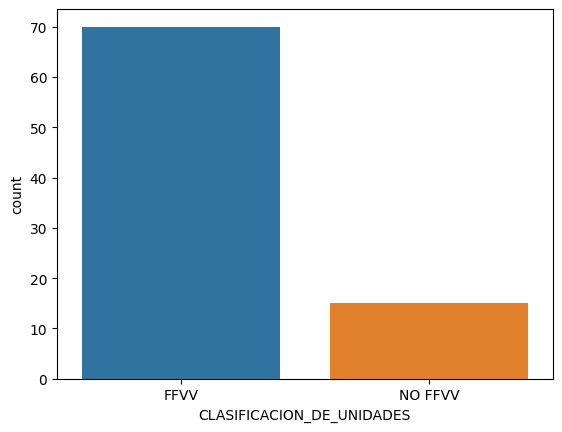

In [108]:
df_movers_nuevo_detractor = df_movers_nuevo[(df_movers_nuevo['Diferencia'] == 'Paso De Promotor A Detractor') & (df_movers_nuevo['PERIODO'] == 202310)].copy()
sns.countplot(data=df_movers_nuevo_detractor, x='CLASIFICACION_DE_UNIDADES')

# **Nube de palabras en general de los que pasaron de promotor a detractor**

In [70]:
df_movers_nuevo_detractor['NOTA_ABIERTA'] = df_movers_nuevo_detractor['NOTA_ABIERTA'].apply(lambda x: unidecode(str(x)))

In [71]:
palabras_list = total_palabras.split()
df_palabras = pd.DataFrame({'Palabra': palabras_list})
df_palabras.to_csv('palabras.csv', index=False, encoding='utf-8')

In [72]:
import re
df_palabras=pd.read_csv("palabras.csv")
df_palabras.head()

,Palabra
0,bien
1,por
2,mi
3,jefa
4,que


In [73]:
clean_txt = []
for palabra in df_palabras['Palabra']:
   desc = str(palabra).lower()

   desc = re.sub(r"&lt;/?.*?&gt;", " &lt;&gt ", desc)

   desc = re.sub(r"[^a-zA-Z\s]", "", desc)
   clean_txt.append(desc)
df_palabras["clean"] = clean_txt
df_palabras.to_csv('palabras_mejoradas.csv', index=False, encoding='utf-8')

In [75]:
df_palabras

,Palabra,clean
0,bien,bien
1,por,por
2,mi,mi
3,jefa,jefa
4,que,que
...,...,...
89087,dia,dia
89088,de,de
89089,certificaciones,certificaciones
89090,para,para


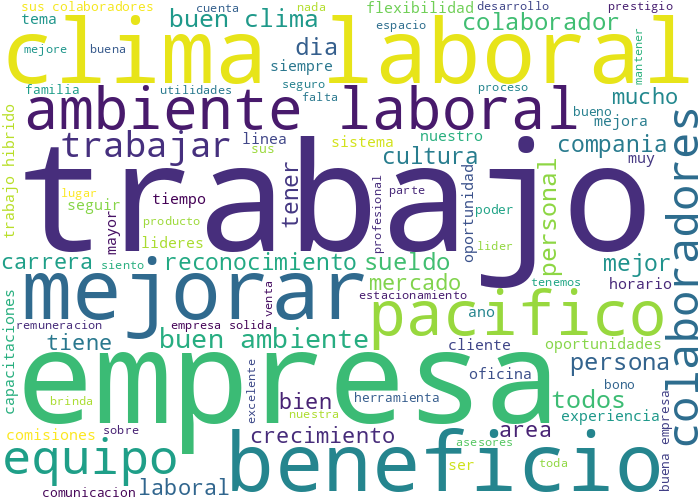

In [78]:
total_palabras = ' '
stopwords = STOPWORDS.update(['que', 'qué', 'con', 'de', 'te', 'en', 'la', 'lo', 'le', 'el', 'las', 'los', 'les', 'por', 'es',
                              'son', 'se', 'para', 'un', 'una', 'chicos', 'su', 'si', 'chic','nos', 'ya', 'hay', 'esta',
                              'pero', 'del', 'mas', 'más', 'eso', 'este', 'como', 'así', 'todo', 'https','Media','omitted',
                              'y', 'mi', 'o', 'q', 'yo', 'al', 'xd', 'sin', 'tu', 'algún', 'donde', 'quien', 'xq', 'hasta', 'v', ' ', 'ti', 'para', 'ok', 'porque', 'sea', 'tambien', 'solo',
                              'sus'])

for mensaje in df_palabras['clean'].values:
    palabras = str(mensaje).lower().split()
    for palabra in palabras:
        total_palabras = total_palabras + palabra + ' '


wordcloud = WordCloud(width = 700, height = 500,
               background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(total_palabras)

wordcloud.to_image()

In [79]:
unicas_preguntas=df_movers_nuevo_detractor['COD_PREGUNTA'].unique()
unicas_preguntas

array(['EX-JEX-0026-PACS', 'EX-JEX-0083-PACS', 'EX-JEX-0072-PACS',
       'EX-JEX-0001-PACS', 'EX-JEX-0025-PACS'], dtype=object)

# **Pregunta EX-JEX-0026-PACS'**

In [109]:
df_movers_nuevo_detractor_pregunta1 = df_movers_nuevo_detractor[(df_movers_nuevo_detractor['COD_PREGUNTA'] == 'EX-JEX-0026-PACS') & (df_movers_nuevo_detractor['PERIODO'] == 202310)].copy()

In [104]:
df_movers_nuevo_detractor_pregunta1['DESC_PREGUNTA'].unique()

array(['En líneas generales y tomando en cuenta lo visto en las secciones previas, ¿qué nos recomendaría para seguir mejorando la experiencia del colaborador en Pacífico?'],
      dtype=object)

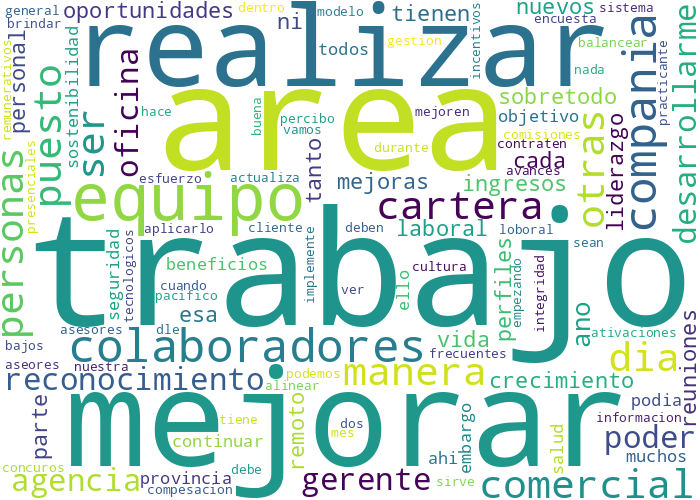

In [102]:
total_palabras = ' '
stopwords = STOPWORDS.update(['que', 'qué', 'con', 'de', 'te', 'en', 'la', 'lo', 'le', 'el', 'las', 'los', 'les', 'por', 'es',
                              'son', 'se', 'para', 'un', 'una', 'chicos', 'su', 'si', 'chic','nos', 'ya', 'hay', 'esta',
                              'pero', 'del', 'mas', 'más', 'eso', 'este', 'como', 'así', 'todo', 'https','Media','omitted',
                              'y', 'mi', 'o', 'q', 'yo', 'al', 'xd', 'sin', 'tu', 'algún', 'donde', 'quien', 'xq', 'hasta', 'v', ' ', 'ti', 'para', 'ok', 'porque', 'sea', 'tambien', 'solo',
                              'sus'])

for mensaje in df_movers_nuevo_detractor_pregunta1['NOTA_ABIERTA'].values:
    palabras = str(mensaje).lower().split()
    for palabra in palabras:
        total_palabras = total_palabras + palabra + ' '


wordcloud = WordCloud(width = 700, height = 500,
               background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(total_palabras)

wordcloud.to_image()

# **Pregunta EX-JEX-0083-PACS**

In [110]:
df_movers_nuevo_detractor_pregunta2 = df_movers_nuevo_detractor[(df_movers_nuevo_detractor['COD_PREGUNTA'] == 'EX-JEX-0083-PACS') & (df_movers_nuevo_detractor['PERIODO'] == 202310)].copy()

In [111]:
df_movers_nuevo_detractor_pregunta2['DESC_PREGUNTA'].unique()

array(['De acuerdo a tu percepción, ¿qué factores crees que influyen para recomendar a Pacífico Seguros como un lugar de trabajo?'],
      dtype=object)

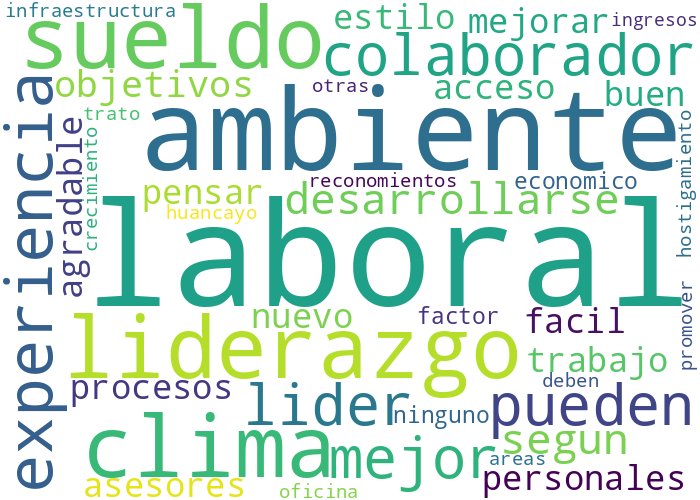

In [113]:
total_palabras = ' '
stopwords = STOPWORDS.update(['que', 'qué', 'con', 'de', 'te', 'en', 'la', 'lo', 'le', 'el', 'las', 'los', 'les', 'por', 'es',
                              'son', 'se', 'para', 'un', 'una', 'chicos', 'su', 'si', 'chic','nos', 'ya', 'hay', 'esta',
                              'pero', 'del', 'mas', 'más', 'eso', 'este', 'como', 'así', 'todo', 'https','Media','omitted',
                              'y', 'mi', 'o', 'q', 'yo', 'al', 'xd', 'sin', 'tu', 'algún', 'donde', 'quien', 'xq', 'hasta', 'v', ' ', 'ti', 'para', 'ok', 'porque', 'sea', 'tambien', 'solo',
                              'sus'])

for mensaje in df_movers_nuevo_detractor_pregunta2['NOTA_ABIERTA'].values:
    palabras = str(mensaje).lower().split()
    for palabra in palabras:
        total_palabras = total_palabras + palabra + ' '


wordcloud = WordCloud(width = 700, height = 500,
               background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(total_palabras)

wordcloud.to_image()

# **Pregunta EX-JEX-0072-PACS**

In [114]:
df_movers_nuevo_detractor_pregunta3 = df_movers_nuevo_detractor[(df_movers_nuevo_detractor['COD_PREGUNTA'] == 'EX-JEX-0072-PACS') & (df_movers_nuevo_detractor['PERIODO'] == 202310)].copy()

In [115]:
df_movers_nuevo_detractor_pregunta3['DESC_PREGUNTA'].unique()

array(['Coméntanos la principal razón de tu puntuación - ENPS'],
      dtype=object)

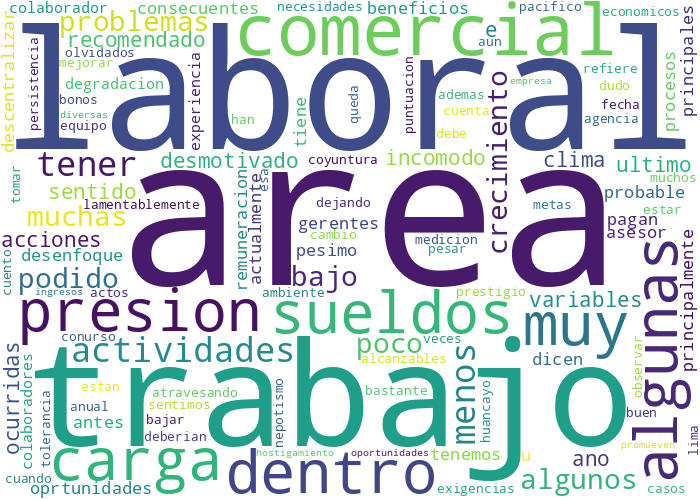

In [116]:
total_palabras = ' '
stopwords = STOPWORDS.update(['que', 'qué', 'con', 'de', 'te', 'en', 'la', 'lo', 'le', 'el', 'las', 'los', 'les', 'por', 'es',
                              'son', 'se', 'para', 'un', 'una', 'chicos', 'su', 'si', 'chic','nos', 'ya', 'hay', 'esta',
                              'pero', 'del', 'mas', 'más', 'eso', 'este', 'como', 'así', 'todo', 'https','Media','omitted',
                              'y', 'mi', 'o', 'q', 'yo', 'al', 'xd', 'sin', 'tu', 'algún', 'donde', 'quien', 'xq', 'hasta', 'v', ' ', 'ti', 'para', 'ok', 'porque', 'sea', 'tambien', 'solo',
                              'sus'])

for mensaje in df_movers_nuevo_detractor_pregunta3['NOTA_ABIERTA'].values:
    palabras = str(mensaje).lower().split()
    for palabra in palabras:
        total_palabras = total_palabras + palabra + ' '


wordcloud = WordCloud(width = 700, height = 500,
               background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(total_palabras)

wordcloud.to_image()

# **Errores**

In [101]:
df_movers_nuevo_detractor_pregunta1['NOTA_ABIERTA'] = df_movers_nuevo_detractor_pregunta1['NOTA_ABIERTA'].apply(lambda x: unidecode(str(x)))
palabras_list = total_palabras.split()
df_palabras = pd.DataFrame({'Palabra': palabras_list})
df_palabras.to_csv('palabras.csv', index=False, encoding='utf-8')
import re
df_palabras=pd.read_csv("palabras.csv")
df_palabras.head()
clean_txt = []
for palabra in df_palabras['Palabra']:
   desc = str(palabra).lower()

   desc = re.sub(r"&lt;/?.*?&gt;", " &lt;&gt ", desc)

   desc = re.sub(r"[^a-zA-Z\s]", "", desc)
   clean_txt.append(desc)
df_palabras["clean"] = clean_txt
df_palabras.to_csv('palabras_mejoradas.csv', index=False, encoding='utf-8')
total_palabras = ' '
stopwords = STOPWORDS.update(['que', 'qué', 'con', 'de', 'te', 'en', 'la', 'lo', 'le', 'el', 'las', 'los', 'les', 'por', 'es',
                              'son', 'se', 'para', 'un', 'una', 'chicos', 'su', 'si', 'chic','nos', 'ya', 'hay', 'esta',
                              'pero', 'del', 'mas', 'más', 'eso', 'este', 'como', 'así', 'todo', 'https','Media','omitted',
                              'y', 'mi', 'o', 'q', 'yo', 'al', 'xd', 'sin', 'tu', 'algún', 'donde', 'quien', 'xq', 'hasta', 'v', ' ', 'ti', 'para', 'ok', 'porque', 'sea', 'tambien', 'solo',
                              'sus'])

for mensaje in df_palabras['clean'].values:
    palabras = str(mensaje).lower().split()
    for palabra in palabras:
        total_palabras = total_palabras + palabra + ' '


wordcloud = WordCloud(width = 700, height = 500,
               background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(total_palabras)

wordcloud.to_image()


ValueError: ignored

In [87]:
# Supongamos que tienes un DataFrame llamado df con columnas 'COD_PREGUNTA' y 'NOTA_ABIERTA'
# Obtener las preguntas únicas
unicas_preguntas = df_movers_nuevo_detractor['COD_PREGUNTA'].unique()
# Configuración común para WordCloud
stopwords = STOPWORDS.union(['que', 'qué', 'con', 'de', 'te', 'en', 'la', 'lo', 'le', 'el', 'las', 'los', 'les', 'por', 'es',
                            'son', 'se', 'para', 'un', 'una', 'chicos', 'su', 'si', 'chic', 'nos', 'ya', 'hay', 'esta',
                            'pero', 'del', 'mas', 'más', 'eso', 'este', 'como', 'así', 'todo', 'https', 'Media', 'omitted',
                            'y', 'mi', 'o', 'q', 'yo', 'al', 'xd', 'sin', 'tu', 'algún', 'donde', 'quien', 'xq', 'hasta', 'v', ' ',
                            'ti', 'para', 'ok', 'porque', 'sea', 'tambien', 'solo', 'sus'])
# Iterar sobre las preguntas y generar nubes de palabras
for pregunta in unicas_preguntas:
   # Filtrar DataFrame por pregunta
   df_pregunta = df_movers_nuevo_detractor[df_movers_nuevo_detractor['COD_PREGUNTA'] == pregunta].copy()
   # Limpiar y procesar las palabras
   df_pregunta['NOTA_ABIERTA'] = df_pregunta['NOTA_ABIERTA'].apply(lambda x: unidecode(str(x)))
   palabras_list = ' '.join(df_pregunta['NOTA_ABIERTA'].str.lower()).split()
   total_palabras = ' '.join([re.sub(r"&lt;/?.*?&gt;", " &lt;&gt ", palabra) for palabra in palabras_list])
   total_palabras = ' '.join([re.sub(r"[^a-zA-Z\s]", "", palabra) for palabra in total_palabras.split() if palabra not in stopwords])
   # Crear y mostrar la nube de palabras
   wordcloud = WordCloud(width=700, height=500, background_color='white', stopwords=stopwords, min_font_size=10).generate(total_palabras)
   plt.figure(figsize=(8, 4))
   plt.imshow(wordcloud, interpolation='bilinear')
   plt.axis("off")
   plt.title(f'WordCloud para Pregunta {pregunta}')
   plt.show()